In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load the CSV dataset
df = pd.read_csv("WELFake_Dataset.csv")

# Drop missing values from 'text' and 'label'
df = df.dropna(subset=["text", "label"])

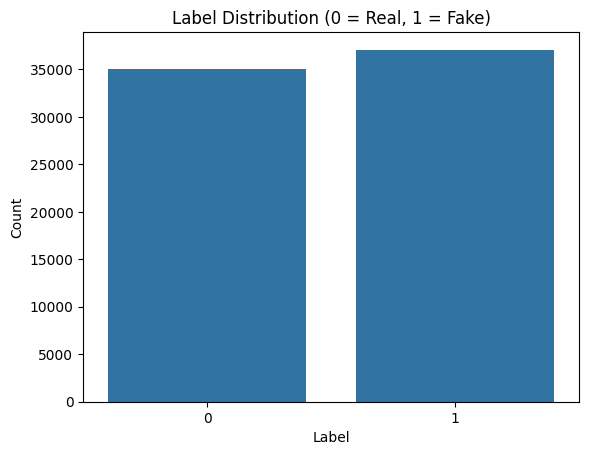

In [3]:
# Visualize label distribution
sns.countplot(data=df, x="label")
plt.title("Label Distribution (0 = Real, 1 = Fake)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [4]:
# Split features and labels
X = df["text"]
y = df["label"]

In [5]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_vect = vectorizer.fit_transform(X)


In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

In [8]:
# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# Predict on test set
rf_preds = rf_model.predict(X_test)

In [10]:
# Print evaluation metrics
print("📊 Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("🔍 Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

📊 Random Forest Accuracy: 0.9416048269644219
🔍 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      7010
           1       0.93      0.96      0.94      7409

    accuracy                           0.94     14419
   macro avg       0.94      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419



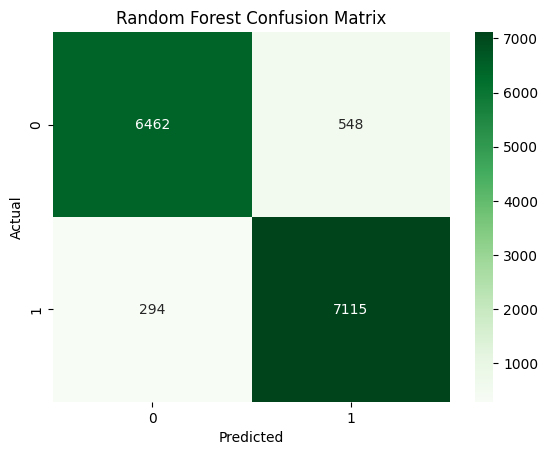

In [12]:
# Display confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()